# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [18]:
# 한글 폰트 사용을 위한 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumBarunGothic-YetHangul.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
os.chdir('C:/boram/데이터분석')

# 변수별 EDA

In [3]:
df = pd.read_csv('./alldata.csv')
df.head()

,지역,쓰레기발생량,주택수,1인가구 평균 배달일수,1인가구 비율
0,종로구,264.2,30259,12.687895,0.162980
1,중구,357.5,15263,13.326083,0.168956
2,용산구,301.2,36157,12.914051,0.150529
3,성동구,301.2,22673,12.816761,0.140947
4,광진구,343.1,56244,14.356042,0.172316


## 1. 지역별 쓰레기 발생량

In [4]:
df2 = df.copy()
df3 = df2.sort_values('쓰레기발생량', ascending = False)
df3.head()

,지역,쓰레기발생량,주택수,1인가구 평균 배달일수,1인가구 비율
23,송파구,727.5,82768,12.702385,0.109152
22,강남구,694.9,45985,14.221517,0.126607
15,강서구,526.8,80480,12.873248,0.146433
21,서초구,504.8,37768,12.127086,0.102306
18,영등포구,449.4,31237,12.937981,0.157372


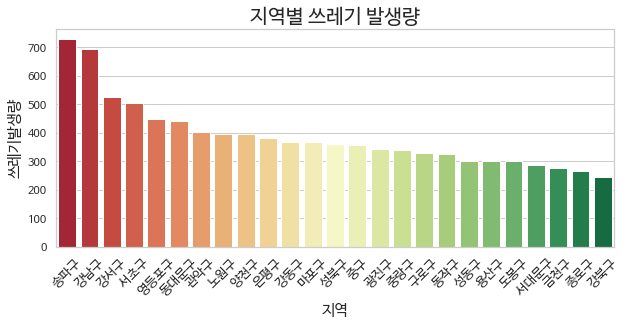

In [10]:
import seaborn as sns
plt.figure(figsize = (10,4))
plt.title("지역별 쓰레기 발생량", fontsize = 20)
sns.set_theme(style="whitegrid")
sns.barplot(data=df3, x='지역', y='쓰레기발생량', palette='RdYlGn')
plt.xticks(rotation=45)
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=13)  # x축 눈금 폰트 크기
plt.show()

In [21]:
import folium

In [22]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [23]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역'
).add_to(m)

m

In [10]:
import folium
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

m = folium.Map(location=[37.559819, 126.963895], zoom_start=11, tiles='cartodbpositron')

folium.GeoJson(seoul_geo, name='지역').add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=df3, 
             columns=['지역', '쓰레기발생량'],
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="자치구별 쓰레기 배출량"
            )

m

## 2. 지역별 주택수

In [11]:
df4 = df2.sort_values('주택수', ascending = False)
df4.head()

,지역,쓰레기발생량,주택수,1인가구 평균 배달일수,1인가구 비율
11,은평구,380.4,89977,12.061740,0.119177
23,송파구,727.5,82768,12.702385,0.109152
15,강서구,526.8,80480,12.873248,0.146433
20,관악구,401.6,70237,15.149475,0.252069
8,강북구,243.1,61677,12.495644,0.146065


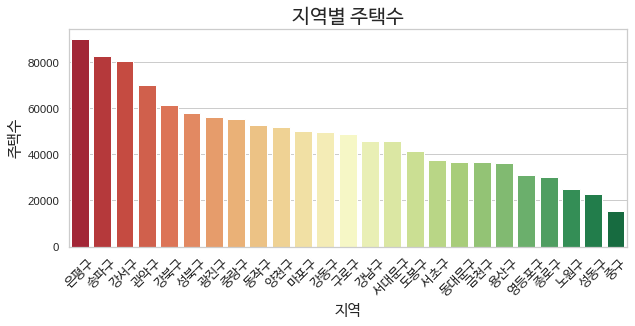

In [13]:
plt.figure(figsize = (10,4))
plt.title("지역별 주택수", fontsize = 20)
sns.set_theme(style="whitegrid")
sns.barplot(data=df4, x='지역', y='주택수', palette='RdYlGn')
plt.xticks(rotation=45)
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=13)  # x축 눈금 폰트 크기
plt.show()

In [14]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=df4, 
             columns=['지역', '주택수'],
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="자치구별 주택수"
            )

m

## 3. 지역별 1인가구 평균 배달일수

In [14]:
df5 = df2.sort_values('1인가구 평균 배달일수', ascending = False)
df5.head()

,지역,쓰레기발생량,주택수,1인가구 평균 배달일수,1인가구 비율
20,관악구,401.6,70237,15.149475,0.252069
4,광진구,343.1,56244,14.356042,0.172316
22,강남구,694.9,45985,14.221517,0.126607
13,마포구,366.4,50403,13.580340,0.164961
5,동대문구,440.1,36905,13.424034,0.170052


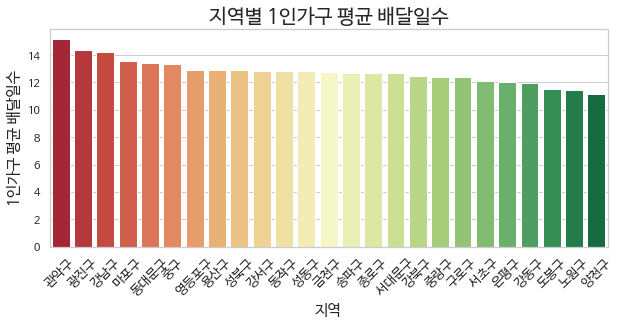

In [16]:
plt.figure(figsize = (10,4))
plt.title("지역별 1인가구 평균 배달일수", fontsize = 20)
sns.set_theme(style="whitegrid")
sns.barplot(data=df5, x='지역', y='1인가구 평균 배달일수', palette='RdYlGn')
plt.xticks(rotation=45)
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=13)  # x축 눈금 폰트 크기
plt.show()

In [18]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=df5, 
             columns=['지역', '1인가구 평균 배달일수'],
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="자치구별 1인가구 평균 배달일수"
            )

m

## 4. 지역별 1인가구 비율

In [17]:
df6 = df2.sort_values('1인가구 비율', ascending = False)
df6.head()

,지역,쓰레기발생량,주택수,1인가구 평균 배달일수,1인가구 비율
20,관악구,401.6,70237,15.149475,0.252069
4,광진구,343.1,56244,14.356042,0.172316
5,동대문구,440.1,36905,13.424034,0.170052
17,금천구,274.5,36580,12.756069,0.169754
1,중구,357.5,15263,13.326083,0.168956


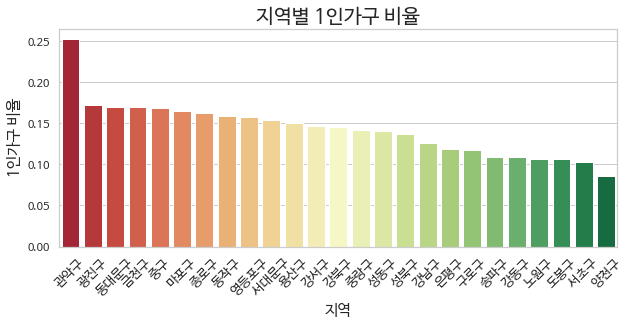

In [19]:
plt.figure(figsize = (10,4))
plt.title("지역별 1인가구 비율", fontsize = 20)
sns.set_theme(style="whitegrid")
sns.barplot(data=df6, x='지역', y='1인가구 비율', palette='RdYlGn')
plt.xticks(rotation=45)
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=13)  # x축 눈금 폰트 크기
plt.show()

In [22]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=df6, 
             columns=['지역', '1인가구 비율'],
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="자치구별 1인가구 비율"
            )

m

## 자치구별 등급 EDA

In [23]:
df_rank = pd.read_csv('./자치구별 등급.csv')
df_rank

,지역,sum
0,관악구,32
1,강남구,26
2,송파구,26
3,광진구,24
4,강서구,24
5,마포구,20
6,동대문구,20
7,은평구,19
8,동작구,18
9,성북구,18


In [24]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=df_rank, 
             columns=['지역', 'sum'],
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="자치구별 등급"
            )

m